In [1]:
from sklearn.metrics import (
    plot_precision_recall_curve, precision_recall_curve, confusion_matrix, classification_report)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Results Analyis
results_df = pd.read_csv("output/exp21_results_default.csv")
#results_df = results_df.assign(pred = np.where(results_df.score > 0.2, 1, 0))
results_df

,Unnamed: 0,Unnamed: 0.1,mid,pid,text,label,pred,pred_proba
0,0,60434,196516,3606,Yes how can I keep it clean Once the baby is b...,1,0,0.232514
1,1,56029,179613,3185,"I am fine doctor, its only that most of the ti...",0,0,0.155010
2,2,58932,190815,3442,Ndio Anavipele Usoni Na Sehemu Ya Siri. Kwa ka...,0,1,0.694831
3,3,62107,202832,3746,Sasa ofisi zenyewe naeza pata wapi Unaendeleaj...,0,0,0.278680
4,4,56157,180083,3196,"Yes I thank you for the program,,it has help ...",0,0,0.028979
...,...,...,...,...,...,...,...,...
2332,2332,57281,184389,3285,Yes ..3 years implantation Your baby is due fo...,0,0,0.119425
2333,2333,49520,156035,2686,Ok thanks Thank you for joining us in this SMS...,0,0,0.003539
2334,2334,62416,204041,3785,Piny iya Rama gi piny matin matin Rem matek ma...,1,1,0.981513
2335,2335,64302,212027,4090,I will take them to the nearest health facilit...,0,0,0.112251


In [3]:
pd.crosstab(results_df.label, results_df.pred)

pred,0,1
label,,
0,1732,105
1,354,146


In [4]:
np.max(results_df.pred_proba)

0.9972777388852351

In [5]:
from sklearn.metrics import classification_report
print(classification_report(results_df.label, results_df.pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1837
           1       0.58      0.29      0.39       500

    accuracy                           0.80      2337
   macro avg       0.71      0.62      0.64      2337
weighted avg       0.78      0.80      0.78      2337



In [6]:
#PR regions
data_size = 1837 # total number of data samples
data_pos = 500 # number of data samples that are actually positive

In [7]:
#Triage -  you can adjust these parameters
triage_recall = 0.95 # recall is at least this threshold, "near-perfect" recall
triage_proportion = 0.70 # predict true for fewer than this threshold

triage_precision = lambda total_num_data, num_actual_positive: (num_actual_positive * triage_recall) / (total_num_data * triage_proportion) # the recall should be at least this threshold

#Prioritize -  you can adjust these parameters
prioritize_precision = 0.95 # precision is at least this threshold, "near-perfect" precision
prioritize_proportion = 0.10 # predict true for more than this threshold

prioritize_recall = lambda total_num_data, num_actual_positive: ((total_num_data * prioritize_proportion) * prioritize_precision) / num_actual_positive # the recall should be at least this threshold


print(f'prioritize_recall: {prioritize_recall(data_size, data_pos)}')
print(f'triage_precision: {triage_precision(data_size, data_pos)}')

#A function to visualize the pr_model curve
def show_pr_model(data, data_size_, data_pos_):
    #plt.figure(figsize=(8, 6))  
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # NEW CODE: for drawing the curve
    plt.plot(data['recall'], data['precision'], label = data['label'], linestyle="solid")


    # triage
    x =  [triage_recall, 1.0]
    y1 = [triage_precision(data_size_, data_pos_), triage_precision(data_size_, data_pos_)]
    y2 = [1.0, 1.0]

    plt.fill_between(x, y1, y2,
                        facecolor='none',
                        color='orange',
                        alpha=0.2)

    plt.text(triage_recall - 0.27, triage_precision(data_size, data_pos) + 0.02, 'Triage Model Region', size=15, color='orange')

    # priortize
    x =  [prioritize_recall(data_size, data_pos), 1.0]
    y1 = [prioritize_precision, prioritize_precision]
    y2 = [1.0, 1.0]

    plt.fill_between(x, y1, y2,
                        facecolor='none',
                        color='blue',
                        alpha=0.2)

    plt.text(prioritize_recall(data_size, data_pos) + 0.01, prioritize_precision - 0.05, 'Prioritize Model Region', size=15, color='blue', alpha=0.5)

    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.xticks(list(plt.xticks()[0]) + [round(triage_recall, 3), round(prioritize_recall(data_size, data_pos), 3)])
    plt.yticks(list(plt.yticks()[0]) + [round(triage_precision(data_size, data_pos), 3), round(prioritize_precision, 3)])
    plt.xticks(rotation=90)
    #plt.title(f'Precision-Recall Curve Regions of an Ideal Model', fontsize=16)
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.tight_layout()
    plt.legend(prop={"size":10})
    
    
    
    plt.show()

prioritize_recall: 0.34903
triage_precision: 0.36939108795396225


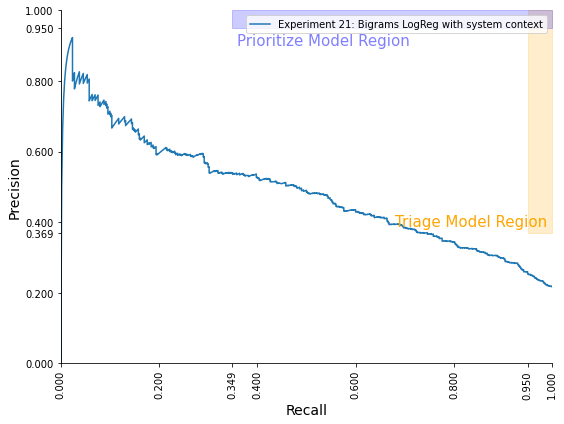

In [8]:
precision, recall, thresholds = precision_recall_curve(results_df['label'], results_df['pred_proba'])

data = {'recall': recall,
        'precision': precision,
        'label': "Experiment 21: Bigrams LogReg with system context"
       }

show_pr_model(data, data_size, data_pos)

In [9]:
thresholds

array([0.00112593, 0.00120299, 0.00120728, ..., 0.98647833, 0.99214887,
       0.99727774])

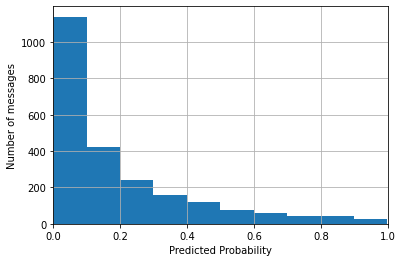

In [10]:
plt.hist(results_df['pred_proba'])
plt.xlabel('Predicted Probability')
plt.ylabel('Number of messages')
plt.axis(xmin=0, xmax=1)
plt.grid();